<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

# 0. Importing modules, reading datasets, and cleaning and preprocessing of data 
<p>&nbsp;</p>

In [1]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.datasets import load_iris
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
import re
import string
import nltk
import os

### *Reading real and fake news datasets.*

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


### *Assigning class 0 to fake news & class 1 to real news* 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

### *Removing last 10 entries from both datasets for manual testing*

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

<ipython-input-9-3aaf8ec2aad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
<ipython-input-9-3aaf8ec2aad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

### *Merging the two datasets*

In [14]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [15]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [16]:
df_merge.shape

(44878, 5)

### *Dropping the following columns: title, subject, and date.*

In [17]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

### *Randomly shuffling the dataset*

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
14458,CAIRO (Reuters) - Saudi Arabia has summoned it...,1
16673,MELBOURNE (Reuters) - Nearly 12 million Austra...,1
6495,Ann Coulter is one of those blatantly offensiv...,0
3580,We ve long been suspicious of Russian meddling...,0
8044,NEW YORK (Reuters) - Democrat Hillary Clinton ...,1


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,CAIRO (Reuters) - Saudi Arabia has summoned it...,1
1,MELBOURNE (Reuters) - Nearly 12 million Austra...,1
2,Ann Coulter is one of those blatantly offensiv...,0
3,We ve long been suspicious of Russian meddling...,0
4,NEW YORK (Reuters) - Democrat Hillary Clinton ...,1


In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [27]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

### *Defining a custom function 'preprocess' to preprocess every text before feeing it into each model.*

In [28]:
def preprocess(text):
    
     # Lowering letters
    text = text.lower()
    
    # Removing html tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Removing twitter usernames
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    
    # Lemmatizing
    text = lemmatizer.lemmatize(text)
    
    # Tokenizing
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)
    
    # Joining words
    text = (' '.join(filtered_sentence))
        
    return text
    

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### *Applying the custom function*

In [30]:
df["text"] = df["text"].apply(preprocess)

In [31]:
x = df["text"]
y = df["class"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

#  1. Models

## 1.1 Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
LR.score(xv_test, y_test)

0.9863636363636363

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5860
           1       0.98      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [40]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, pred_lr).ravel()
print(f'True Positives: {tp1}')
print(f'False Positives: {fp1}')
print(f'True Negatives: {tn1}')
print(f'False Negatives: {fn1}')

True Positives: 5294
False Positives: 87
True Negatives: 5773
False Negatives: 66


<AxesSubplot:>

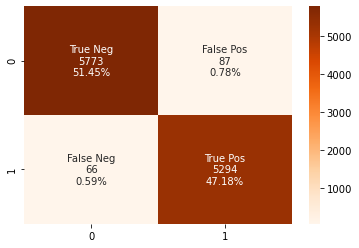

In [41]:
cm1 = confusion_matrix(y_test, pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Oranges')

In [42]:
tpr1=tp1/(tp1+fn1)
fpr1 = fp1/(fp1+tn1)
tnr1=tn1/(tn1+fp1)
print(f'Sensitivity:{tpr1}' "," f'Specificity:{tnr1}')


Sensitivity:0.9876865671641791,Specificity:0.9851535836177474


In [43]:
tprr1=tpr1

In [44]:
pred_prob1 = LR.predict_proba(xv_test)

In [45]:
print(tprr1)

0.9876865671641791


In [46]:
print(tpr1)

0.9876865671641791


## 1.2. Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
pred_rfc = RFC.predict(xv_test)

In [50]:
RFC.score(xv_test, y_test)

0.9916221033868092

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5860
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



cm = confusion_matrix(y_test, pred_rfc)
cm

In [52]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, pred_rfc).ravel()
print(f'True Positives: {tp2}')
print(f'False Positives: {fp2}')
print(f'True Negatives: {tn2}')
print(f'False Negatives: {fn2}')

True Positives: 5312
False Positives: 46
True Negatives: 5814
False Negatives: 48


<AxesSubplot:>

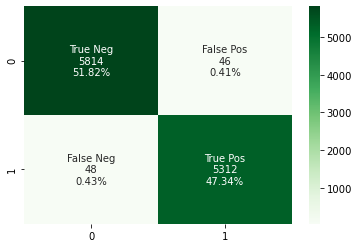

In [53]:
cm2 = confusion_matrix(y_test, pred_rfc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Greens')

In [54]:
tpr2=tp2/(tp2+fn2)
fpr2 = fp2/(fp2+tn2)
tnr2=tn2/(tn2+fp2)
print(f'Sensitivity:{tpr2}' "," f'Specificity:{tnr2}')


Sensitivity:0.991044776119403,Specificity:0.9921501706484641


In [55]:
tprr2=tpr2

In [56]:
pred_prob2 = RFC.predict_proba(xv_test)

## 1.3. Naive Bayes Classifier

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
NBC = MultinomialNB()
NBC.fit(xv_train, y_train)

MultinomialNB()

In [60]:
pred_nbc = NBC.predict(xv_test)

In [61]:
NBC.score(xv_test, y_test)

0.9319964349376114

In [62]:
print(classification_report(y_test, pred_nbc))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5860
           1       0.93      0.92      0.93      5360

    accuracy                           0.93     11220
   macro avg       0.93      0.93      0.93     11220
weighted avg       0.93      0.93      0.93     11220



cm3 = confusion_matrix(y_test, pred_nbc)
cm3

In [63]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_test, pred_nbc).ravel()
print(f'True Positives: {tp3}')
print(f'False Positives: {fp3}')
print(f'True Negatives: {tn3}')
print(f'False Negatives: {fn3}')

True Positives: 4945
False Positives: 348
True Negatives: 5512
False Negatives: 415


<AxesSubplot:>

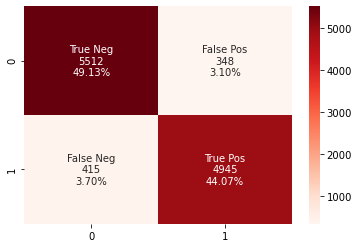

In [64]:
cm3 = confusion_matrix(y_test, pred_nbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm3, annot=labels, fmt='', cmap='Reds')

In [65]:
tpr3=(tp3/(tp3+fn3))
fpr3 = fp3/(fp3+tn3)
tnr3=tn3/(tn3+fp3)
print(f'Sensitivity:{tpr3}' "," f'Specificity:{tnr3}')


Sensitivity:0.9225746268656716,Specificity:0.9406143344709897


In [66]:
tprr3=tpr3

In [67]:
pred_prob3 = NBC.predict_proba(xv_test)


## 1.4. Passive Aggressive Classifier

In [68]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [69]:
PAC = PassiveAggressiveClassifier(C = 0.5, random_state = 5)

In [70]:
PAC.fit(xv_train, y_train)

PassiveAggressiveClassifier(C=0.5, random_state=5)

In [71]:
pred_pac = PAC.predict(xv_test)

In [72]:
PAC.score(xv_test, y_test)

0.9940285204991087

In [73]:
print(classification_report(y_test, pred_pac))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5860
           1       0.99      0.99      0.99      5360

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



cm4 = confusion_matrix(y_test, pred_pac)
cm4

In [74]:
tn4, fp4, fn4, tp4 = confusion_matrix(y_test, pred_pac).ravel()
print(f'True Positives: {tp4}')
print(f'False Positives: {fp4}')
print(f'True Negatives: {tn4}')
print(f'False Negatives: {fn4}')

True Positives: 5320
False Positives: 27
True Negatives: 5833
False Negatives: 40


<AxesSubplot:>

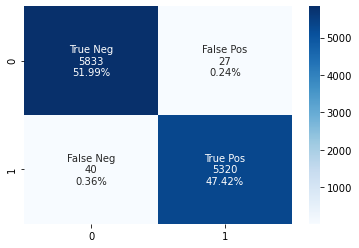

In [75]:
cm4 = confusion_matrix(y_test, pred_pac)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm4.flatten()/np.sum(cm4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm4, annot=labels, fmt='', cmap='Blues')

In [76]:
tpr4=(tp4/(tp4+fn4))
fpr4 = fp4/(fp4+tn4)
tnr4=tn4/(tn4+fp4)
print(f'Sensitivity:{tpr4}' "," f'Specificity:{tnr4}')

Sensitivity:0.9925373134328358,Specificity:0.9953924914675768


In [77]:
tprr4=tpr4

# 2. ROC Curve of the models(excluding PAC)

In [78]:
from sklearn.metrics import roc_curve

In [79]:


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [80]:
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])


print(auc_score1, auc_score2, auc_score3)

0.9986146592124701 0.9996371173144517 0.978848027354694


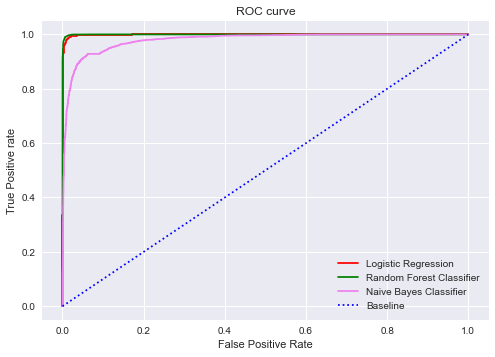

In [81]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Random Forest Classifier')
plt.plot(fpr3, tpr3, linestyle='-',color='violet', label='Naive Bayes Classifier')
plt.plot(p_fpr, p_tpr, linestyle=':', color='blue', label='Baseline')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=600)
plt.show();

# 3. Bar Chart for comparing Sensitivity and Specificity of the models

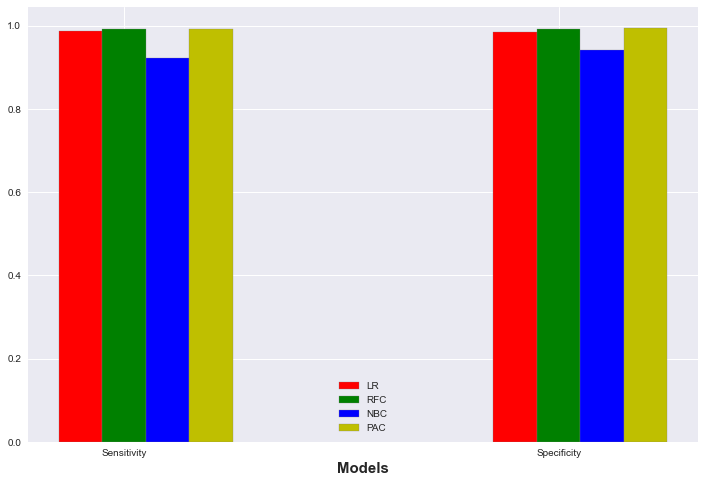

In [85]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
LR =  [tprr1, tnr1]
RFC = [tprr2, tnr2]
NBC = [tprr3, tnr3]
PAC = [tprr4, tnr4]

 
# Set position of bar on X axis
br1 = np.arange(len(PAC))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, LR, color ='r', width = barWidth,
        edgecolor ='grey', label ='LR')
plt.bar(br2, RFC, color ='g', width = barWidth,
        edgecolor ='grey', label ='RFC')

plt.bar(br3, NBC, color ='b', width = barWidth,
        edgecolor ='grey', label ='NBC')
        
plt.bar(br4, PAC, color ='y', width = barWidth,
        edgecolor ='grey', label ='PAC')


 
# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(PAC))],
        ['Sensitivity', 'Specificity'])
 
plt.legend()
plt.show()

# 4. Testing with manual entry

In [86]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(preprocess) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_NBC = NBC.predict(new_xv_test)
    pred_PAC = PAC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nRFC Prediction: {} \nNBC Prediction: {} \nPAC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_RFC[0]), 
                                                                                                              output_lable(pred_NBC[0]), 
                                                                                                              output_lable(pred_PAC[0])))

In [ ]:
news = str(input())
manual_testing(news)